<a href="https://colab.research.google.com/github/thessaalexandra/Hello-Project---Thessalonika-Alexandra-M/blob/main/Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install xlsxwriter

In [438]:
#Membaca data

data = []
data = pd.read_excel('bengkel.xlsx')
print(data)

     id  servis  harga
0     1      58      7
1     2      54      1
2     3      98      2
3     4      52      4
4     5      11      4
..  ...     ...    ...
95   96      30      1
96   97      25      3
97   98      27     10
98   99       8      6
99  100      11      8

[100 rows x 3 columns]


Variabel Linguistik yang digunakan adalah harga dan Servis yang terbagi menjadi:

pada variabel servis terdapat 3 nilai linguistik: 

- servis Buruk
- servis Baik
- servis Cukup

pada variabel harga terdapat 3 nilai linguistik;
- harga Murah
- harga Mahal 
- harga Cukup

Dengan 3 Variabel 

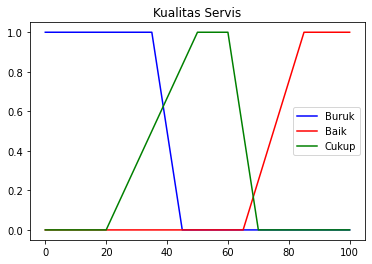

In [439]:
import matplotlib.pyplot as plt
#Servis
#Bentuk dan Batas fungsi Keanggotaan yang kami gunakan adalah bentuk Trapesium
#Servis buruk dimulai dari nilai 1-35
#Servis cukup dimulai dari nilai 50-60
#Servis baik dimulai dari nilai 85-100


def servisBuruk(nilai):
  if(nilai >= 45):
    return 0
  elif(nilai >= 35) and (nilai <= 45):
    return (45-nilai)/(45-35)
  elif(nilai <= 35):
    return 1

def servisCukup(nilai):
  if(nilai <= 20) or (nilai >= 70):
    return 0
  elif(nilai >= 20) and (nilai <= 50):
    return (nilai-20)/(50-20)
  elif(nilai >= 50) and (nilai <= 60):
    return 1
  elif(nilai >= 60) and (nilai <= 70):
    return (70-nilai)/(70-60)

def servisBaik(nilai):
  if(nilai <= 65):
    return 0
  elif(nilai >= 65) and (nilai <= 85):
    return (nilai-65)/(85-65)
  elif(nilai >= 85):
    return 1 

value = range (101)
plt.plot(value, [servisBuruk(nilai) for nilai in value], 'b')
plt.plot(value, [servisBaik(nilai) for nilai in value], 'r')
plt.plot(value, [servisCukup(nilai) for nilai in value], 'g')
plt.title("Kualitas Servis")

plt.plot(0, 0, 'b', label = 'Buruk')
plt.plot(0, 0, 'r', label = 'Baik')
plt.plot(0, 0, 'g', label = 'Cukup')
plt.legend()
plt.show()

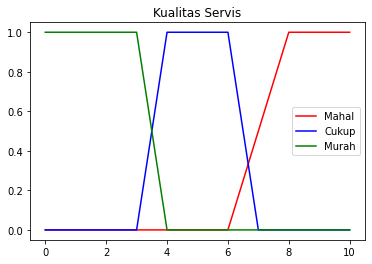

In [440]:
import matplotlib.pyplot as plt
#Harga 
# Bentuk dan Batas fungsi Keanggotaan yang kami gunakan adalah bentuk Trapesium
# harga yang dimasukan dari range bilangan real 1 - 10
# harga murah mulai dari angka 1 - 3
# harga cukup mulai dari angka 3 - 7
# harga mahal akan dimulai dari angka  6 - 10

def hargaMurah(angka):
  if (angka > 3):
    return 0 
  elif(angka > 2) and (angka < 3):
    return (angka - 2)/(3 - 2)
  elif (angka <= 3):
    return 1

def hargaCukup(angka):
  if (angka <= 3) or  (angka >= 7):
    return 0
  elif (angka >= 3) and (angka <= 4):
    return (angka - 3)/(4 - 3)
  elif(angka >= 4) and (angka <= 6):
    return 1
  elif (angka >= 6) and (angka <= 7):
    return (7 - angka)/(7 - 6)


def hargaMahal(angka):
  if (angka <= 6 ):
    return 0
  elif(angka >= 6) and (angka <= 8):
    return (angka-6)/(8 - 6)
  elif(angka >= 8):
    return 1


value = range (11)
plt.plot(value, [hargaMahal(angka) for angka in value], 'r')
plt.plot(value, [hargaCukup(angka) for angka in value], 'b')
plt.plot(value, [hargaMurah(angka) for angka in value], 'g')
plt.title("Kualitas Servis")

plt.plot(0, 0, 'r', label = 'Mahal')
plt.plot(0, 0, 'b', label = 'Cukup')
plt.plot(0, 0, 'g', label = 'Murah')
plt.legend()
plt.show()

In [441]:
#Proses Fuzzifikasi

def fuzzifikasiServis(nilaiServis):
  servisSet = {}
  servisSet['Buruk'] = servisBuruk(nilaiServis)
  servisSet['Cukup'] = servisCukup(nilaiServis)
  servisSet['Baik'] = servisBaik(nilaiServis)
  return servisSet

def fuzzifikasiHarga(nilaiHarga):
  hargaSet = {}
  hargaSet['Mahal'] = hargaMahal(nilaiHarga)
  hargaSet['Cukup'] = hargaCukup(nilaiHarga)
  hargaSet['Murah'] = hargaMurah(nilaiHarga)
  return hargaSet

In [442]:
#Proses Inferensi

def inferensi(setServis, setHarga):
  setInferensi = {'Direkomendasikan': [], 'Kurang Direkomendasikan': [], 'Tidak Direkomendasikan': []}
  
  setInferensi['Direkomendasikan'].append(min(setServis['Baik'], setHarga['Murah']))
  setInferensi['Direkomendasikan'].append(min(setServis['Baik'], setHarga['Cukup']))
  setInferensi['Kurang Direkomendasikan'].append(min(setServis['Baik'], setHarga['Mahal']))
  setInferensi['Kurang Direkomendasikan'].append(min(setServis['Cukup'], setHarga['Cukup']))
  setInferensi['Direkomendasikan'].append(min(setServis['Cukup'], setHarga['Murah']))
  setInferensi['Kurang Direkomendasikan'].append(min(setServis['Cukup'], setHarga['Mahal']))
  setInferensi['Tidak Direkomendasikan'].append(min(setServis['Buruk'], setHarga['Mahal']))
  setInferensi['Kurang Direkomendasikan'].append(min(setServis['Buruk'], setHarga['Murah']))
  setInferensi['Tidak Direkomendasikan'].append(min(setServis['Buruk'], setHarga['Cukup']))

  setInferensi['Direkomendasikan'] = max(setInferensi['Direkomendasikan'])
  setInferensi['Kurang Direkomendasikan'] = max(setInferensi['Kurang Direkomendasikan'])
  setInferensi['Tidak Direkomendasikan'] = max(setInferensi['Tidak Direkomendasikan'])

  return setInferensi


In [443]:
#Proses Defusifikasi

def defusifikasi(setInferensi):
  x, y = 0, 0
  setDefusifikasi = {'Direkomendasikan':100, 'Kurang Direkomendasikan': 70, 'Tidak Direkomendasikan': 50}

  for i in setDefusifikasi.keys():
    x += setInferensi[i] * setDefusifikasi[i] 
    y += setInferensi[i]
  return x/y

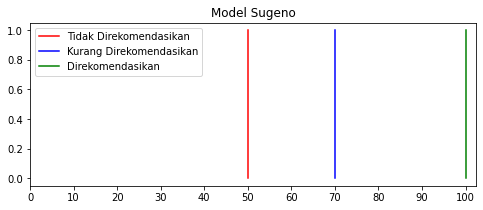

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.title("Model Sugeno")
plt.plot([50, 50],[0, 1], label='Tidak Direkomendasikan', color='r')
plt.plot([70, 70],[0, 1], label='Kurang Direkomendasikan', color='b')
plt.plot([100, 100],[0, 1], label='Direkomendasikan', color='g')
plt.xticks(np.arange(0, 101, 10.0))
plt.legend()
plt.show()

In [445]:
#main Program

hasilDefusifikasi = []

def mainProgram(data):
  for i in range(len(data)):
    servis = fuzzifikasiServis(data['servis'][i])
    harga = fuzzifikasiHarga(data['harga'][i])
    print(servis, harga)
    setInferensi = inferensi(servis, harga)
    #print(setInferensi)
    hasil = defusifikasi(setInferensi)
    hasilDefusifikasi.append(hasil)
  return hasilDefusifikasi
  

dataBengkel = mainProgram(data)
data['hasil'] = dataBengkel

#df = pd.DataFrame()
#data = dataBengkel
#data = pd.DataFrame
#data = pd.ExcelWriter('peringkat.xlsx')
#data = pd.ExcelWriter('peringkat.xlsx', engine='xlsxwriter')
#df.to_excel(data, sheet_name='Sheet1')
#data.save()
#data

{'Buruk': 0, 'Cukup': 1, 'Baik': 0} {'Mahal': 0.5, 'Cukup': 0, 'Murah': 0}
{'Buruk': 0, 'Cukup': 1, 'Baik': 0} {'Mahal': 0, 'Cukup': 0, 'Murah': 1}
{'Buruk': 0, 'Cukup': 0, 'Baik': 1} {'Mahal': 0, 'Cukup': 0, 'Murah': 1}
{'Buruk': 0, 'Cukup': 1, 'Baik': 0} {'Mahal': 0, 'Cukup': 1.0, 'Murah': 0}
{'Buruk': 1, 'Cukup': 0, 'Baik': 0} {'Mahal': 0, 'Cukup': 1.0, 'Murah': 0}
{'Buruk': 0, 'Cukup': 1, 'Baik': 0} {'Mahal': 1, 'Cukup': 0, 'Murah': 0}
{'Buruk': 0, 'Cukup': 0.9, 'Baik': 0} {'Mahal': 1.0, 'Cukup': 0, 'Murah': 0}
{'Buruk': 1, 'Cukup': 0.3333333333333333, 'Baik': 0} {'Mahal': 1, 'Cukup': 0, 'Murah': 0}
{'Buruk': 0, 'Cukup': 0.8333333333333334, 'Baik': 0} {'Mahal': 0, 'Cukup': 0, 'Murah': 1}
{'Buruk': 0.9, 'Cukup': 0.5333333333333333, 'Baik': 0} {'Mahal': 1, 'Cukup': 0, 'Murah': 0}
{'Buruk': 1, 'Cukup': 0, 'Baik': 0} {'Mahal': 0, 'Cukup': 1, 'Murah': 0}
{'Buruk': 0.7, 'Cukup': 0.6, 'Baik': 0} {'Mahal': 0.5, 'Cukup': 0, 'Murah': 0}
{'Buruk': 0, 'Cukup': 0, 'Baik': 0.75} {'Mahal': 0, 'Cu

In [446]:
#df = pd.DataFrame()
data = data.sort_values(by = 'hasil', ascending = False)[:10]
#data = pd.ExcelWriter('peringkat.xlsx', engine='xlsxwriter')
#df.to_excel(data, sheet_name='Sheet1')
data.to_excel('peringkat.xls')
#data.save()
print(data)

    id  servis  harga  hasil
74  75      61      1  100.0
12  13      80      3  100.0
51  52      94      3  100.0
43  44      63      2  100.0
55  56      49      3  100.0
59  60      79      6  100.0
33  34      93      4  100.0
20  21      48      2  100.0
16  17      70      3  100.0
15  16      82      6  100.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """
